<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#AutoEncoders" data-toc-modified-id="AutoEncoders-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>AutoEncoders</a></span></li><li><span><a href="#Steps-of-Auto-Encoders" data-toc-modified-id="Steps-of-Auto-Encoders-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Steps of Auto Encoders</a></span></li><li><span><a href="#Code-Example" data-toc-modified-id="Code-Example-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Code Example</a></span><ul class="toc-item"><li><span><a href="#Imports" data-toc-modified-id="Imports-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Imports</a></span></li></ul></li><li><span><a href="#Data" data-toc-modified-id="Data-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Data</a></span><ul class="toc-item"><li><span><a href="#Train-and-test-data" data-toc-modified-id="Train-and-test-data-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Train and test data</a></span></li><li><span><a href="#Number-of-users" data-toc-modified-id="Number-of-users-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Number of users</a></span></li><li><span><a href="#Convert-train/test-array-to-list-of-list-to-be-used-by-torch" data-toc-modified-id="Convert-train/test-array-to-list-of-list-to-be-used-by-torch-4.3"><span class="toc-item-num">4.3&nbsp;&nbsp;</span>Convert train/test array to list of list to be used by torch</a></span></li><li><span><a href="#Convert-array-to-torch-tensors" data-toc-modified-id="Convert-array-to-torch-tensors-4.4"><span class="toc-item-num">4.4&nbsp;&nbsp;</span>Convert array to torch tensors</a></span></li></ul></li><li><span><a href="#Class-stacked-auto-encoders-(SAE)" data-toc-modified-id="Class-stacked-auto-encoders-(SAE)-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Class stacked auto encoders (SAE)</a></span><ul class="toc-item"><li><span><a href="#Training-stacked-auto-encoders" data-toc-modified-id="Training-stacked-auto-encoders-5.1"><span class="toc-item-num">5.1&nbsp;&nbsp;</span>Training stacked auto encoders</a></span></li><li><span><a href="#Testing-the-auto-encoders" data-toc-modified-id="Testing-the-auto-encoders-5.2"><span class="toc-item-num">5.2&nbsp;&nbsp;</span>Testing the auto encoders</a></span></li></ul></li></ul></div>

# AutoEncoders

Additional Readings:
- Malte Skarupke, 2016, [Neural Networks Are Impressively Good At Compression](https://probablydance.com/2016/04/30/neural-networks-are-impressively-good-at-compression/)
- Francois Chollet, 2016, [Building Autoencoders in Keras](https://blog.keras.io/building-autoencoders-in-keras.html)
- Chris McCormick, 2014, [Deep Learning Tutorial – Sparse Autoencoder](http://mccormickml.com/2014/05/30/deep-learning-tutorial-sparse-autoencoder/)
- Eric Wilkinson, 2014, [Deep Learning: Sparse Autoencoders](http://www.ericlwilkinson.com/blog/2014/11/19/deep-learning-sparse-autoencoders)
- Alireza Makhzani, 2014, [k-Sparse Autoencoders](https://arxiv.org/pdf/1312.5663.pdf)
- Pascal Vincent, 2008, [Extracting and Composing Robust Features with Denoising Autoencoders](http://www.cs.toronto.edu/~larocheh/publications/icml-2008-denoising-autoencoders.pdf)
- Salah Rifai, 2011, [Contractive Auto-Encoders: Explicit Invariance During Feature Extraction](http://machinelearning.wustl.edu/mlpapers/paper_files/ICML2011Rifai_455.pdf)
- Pascal Vincent, 2010, [Stacked Denoising Autoencoders: Learning Useful Representations in a Deep Network with a Local Denoising Criterion](http://www.jmlr.org/papers/volume11/vincent10a/vincent10a.pdf)
- Geoffrey Hinton, 2006, [Reducing the Dimensionality of Data with Neural Networks](https://www.cs.toronto.edu/~hinton/science.pdf)


In [1]:
from IPython.display import Image

In [2]:
%%bash
ls images/

auto_encoder1.png
denoising_ae.png
stacked_autoencoder.png
steps


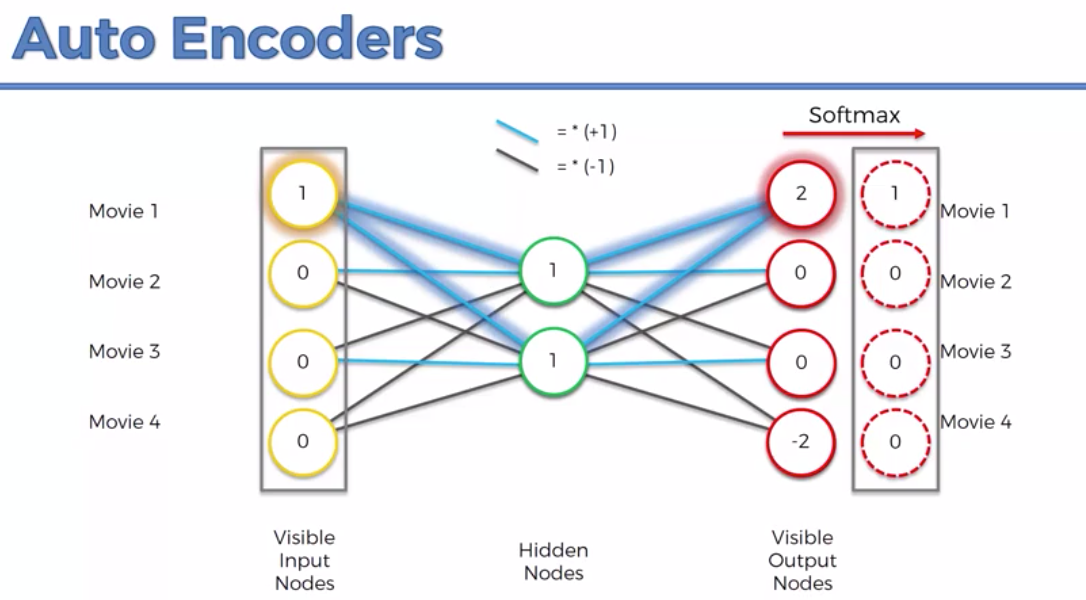

In [3]:
Image('images/auto_encoder1.png')

# Steps of Auto Encoders

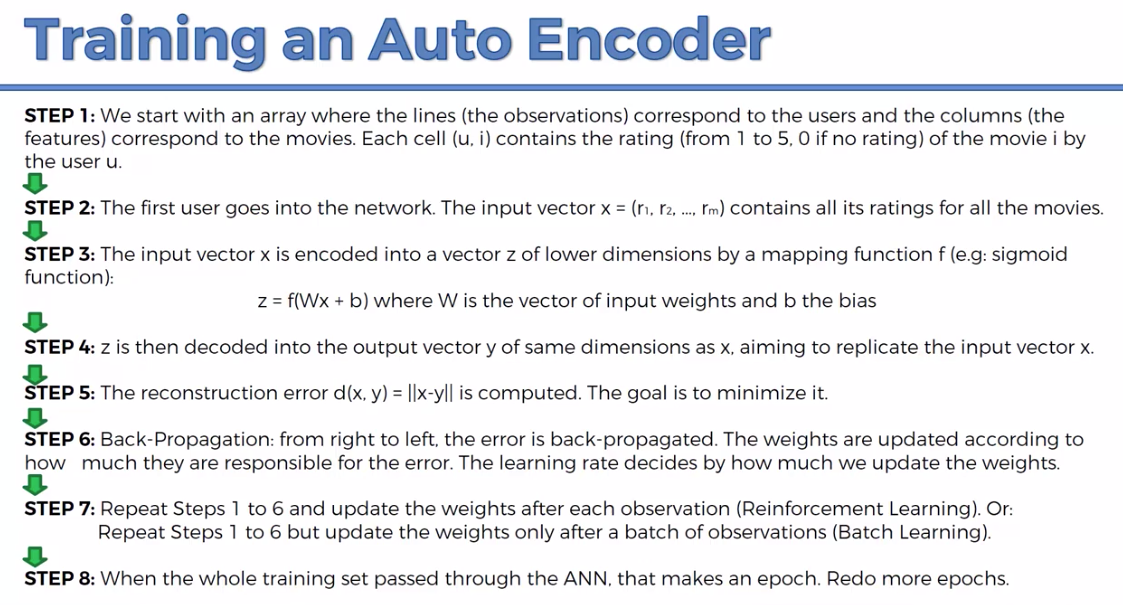

In [4]:
Image('images/steps/step0.png')

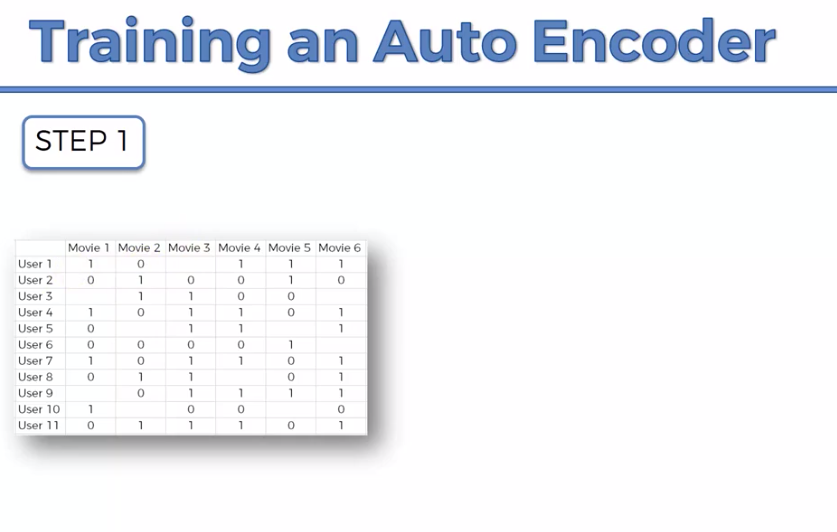

In [5]:
Image('images/steps/step1_data_array.png')

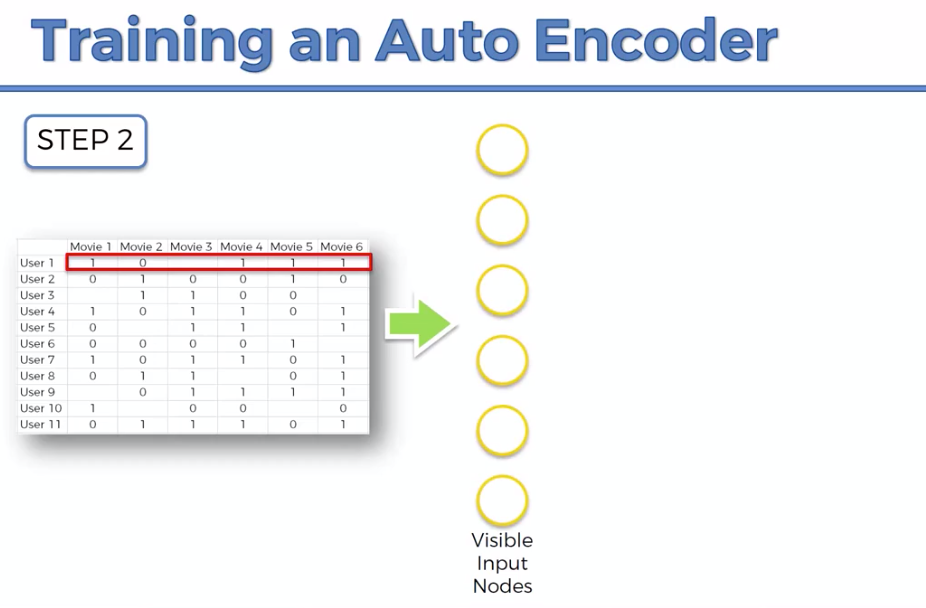

In [6]:
Image('images/steps/step2_take_1st_row.png')

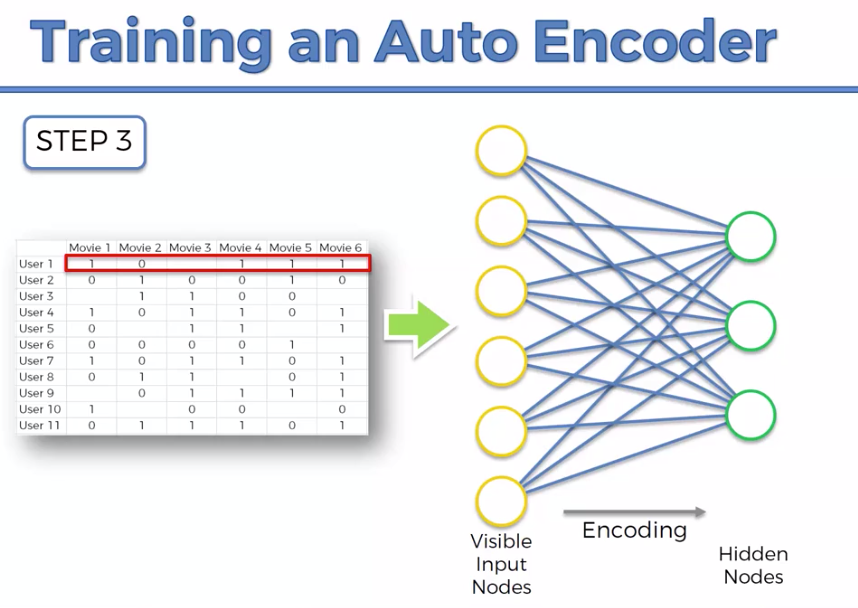

In [7]:
Image('images/steps/step3_hidden_layer.png')

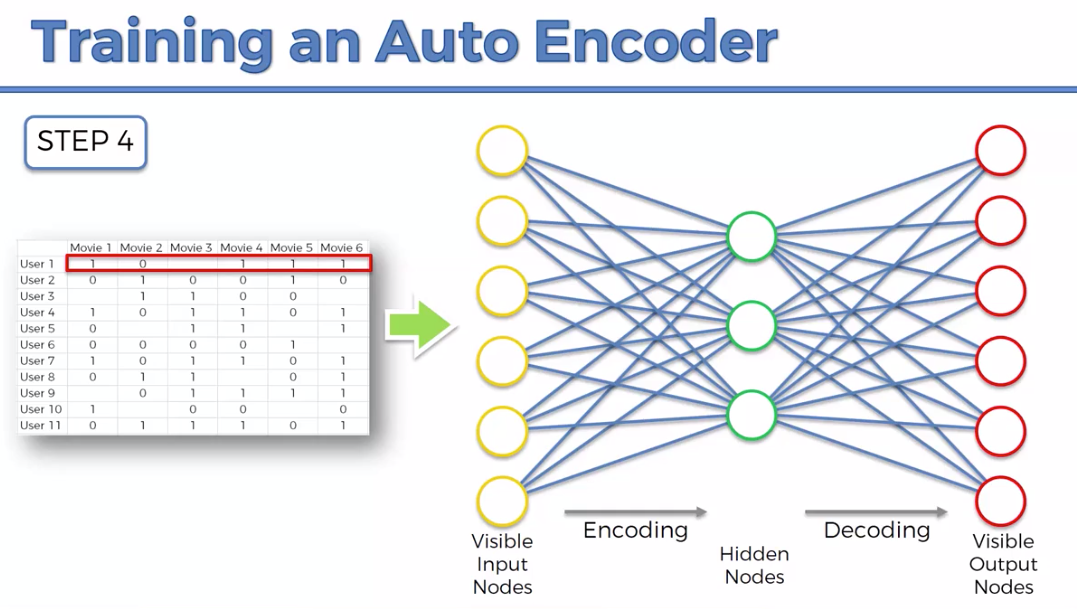

In [8]:
Image('images/steps/step4_calculate_visible_outputs.png')

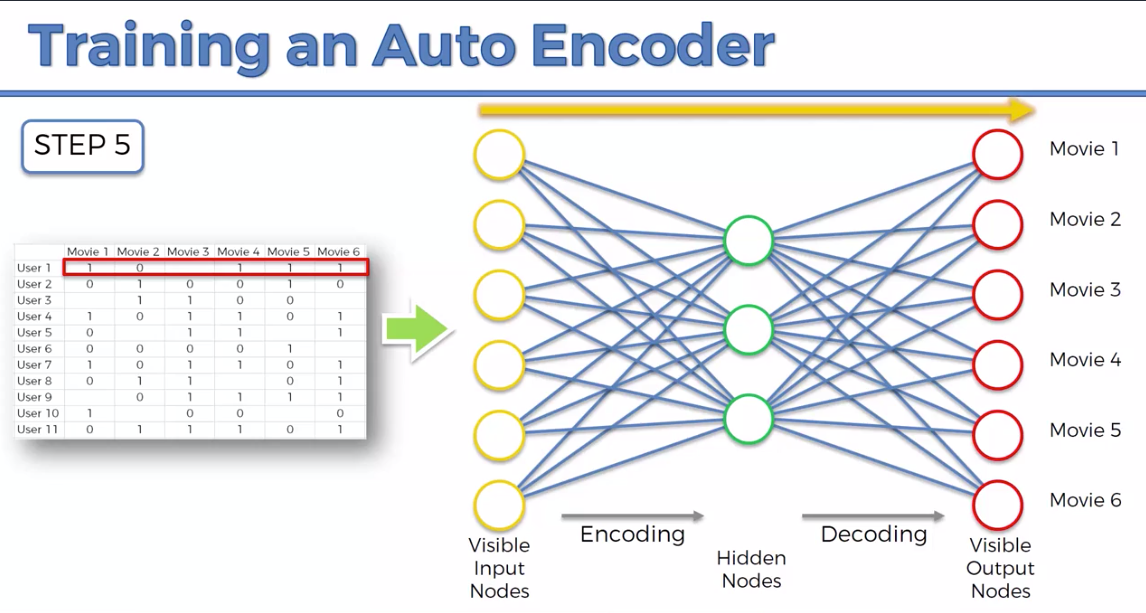

In [9]:
Image('images/steps/step5_compare_results_to_ratings.png')

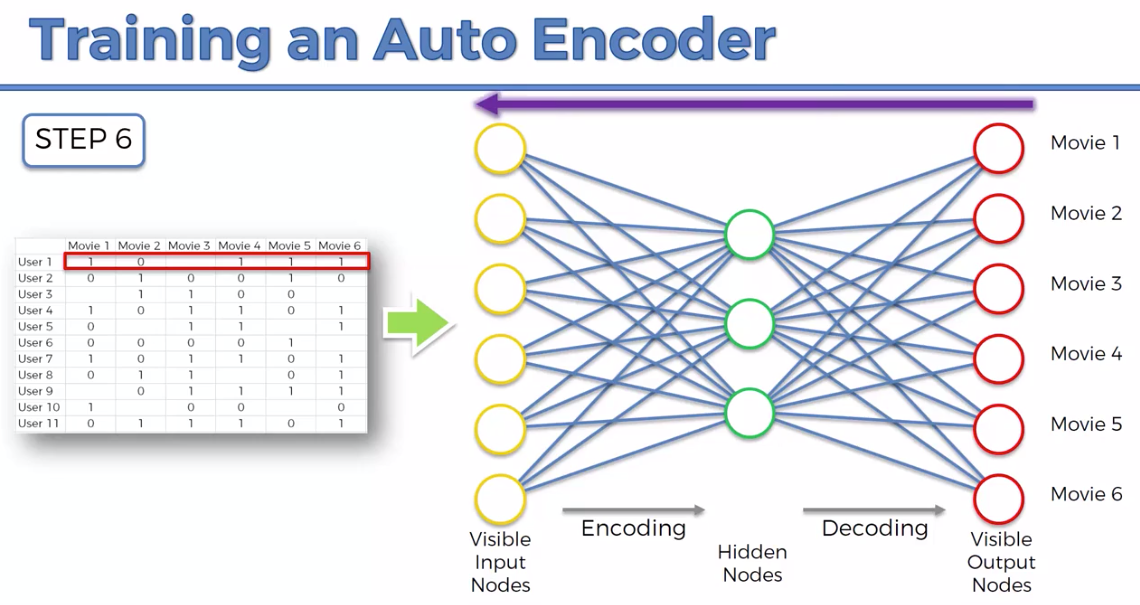

In [10]:
Image('images/steps/step6_calculate_the_error.png')

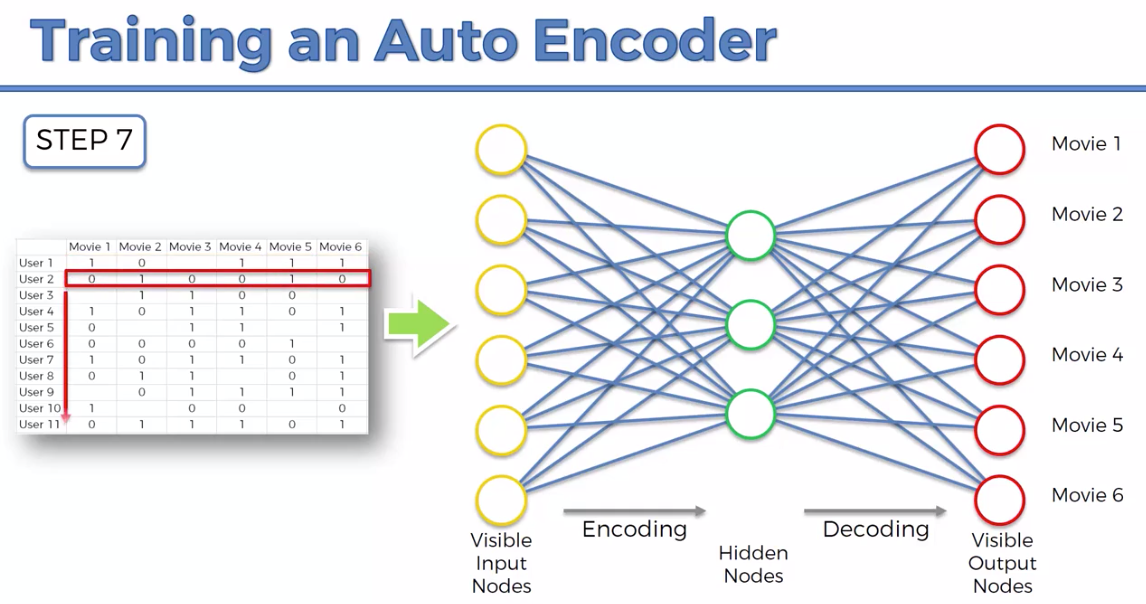

In [11]:
Image('images/steps/step7_take_next_rows.png')

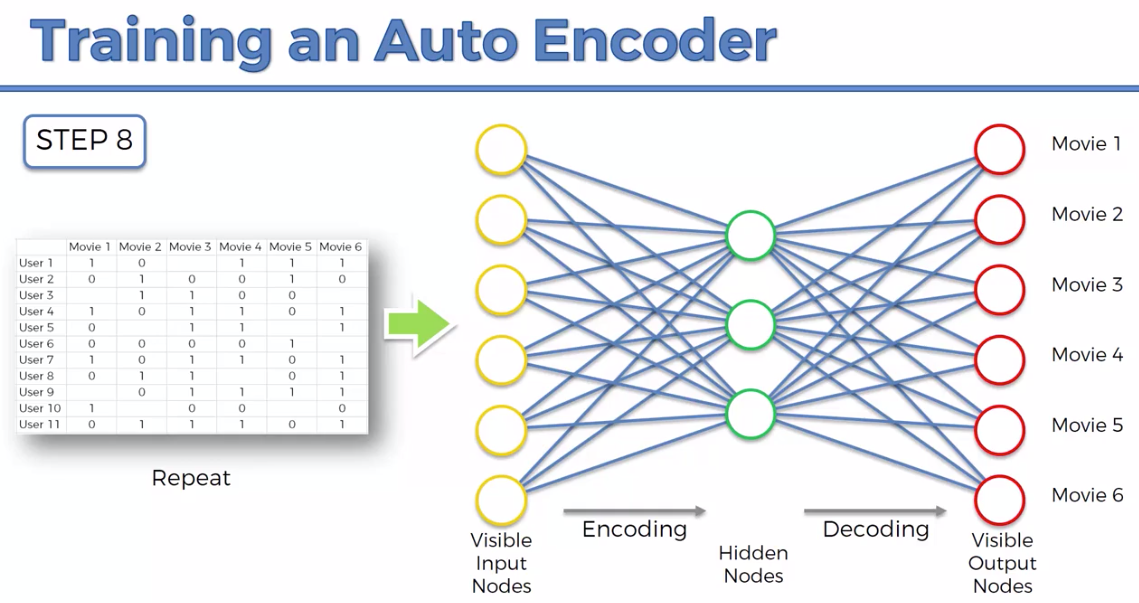

In [12]:
Image('images/steps/step8_after_done_with_rows_repeat_epoch.png')

# Code Example

## Imports

In [13]:
# Importing the libraries
import numpy as np
import pandas as pd
import torch
import torch.nn as nn
import torch.nn.parallel
import torch.optim as optim
import torch.utils.data
from torch.autograd import Variable

# Data

In [14]:
# Importing the dataset
movies = pd.read_csv('ml-1m/movies.dat', sep = '::', header = None,
                     engine = 'python', encoding = 'latin-1')
users = pd.read_csv('ml-1m/users.dat', sep = '::', header = None,
                    engine = 'python', encoding = 'latin-1')
ratings = pd.read_csv('ml-1m/ratings.dat', sep = '::', header = None,
                      engine = 'python', encoding = 'latin-1')


print(f'movies shape = {movies.shape}, \nusers.shape = {users.shape},\
      \nratings.shape = {ratings.shape}')
display(movies.head(), users.head(), ratings.head())

movies shape = (3883, 3), 
users.shape = (6040, 5),      
ratings.shape = (1000209, 4)


0                                   1                             2
0  1                    Toy Story (1995)   Animation|Children's|Comedy
1  2                      Jumanji (1995)  Adventure|Children's|Fantasy
2  3             Grumpier Old Men (1995)                Comedy|Romance
3  4            Waiting to Exhale (1995)                  Comedy|Drama
4  5  Father of the Bride Part II (1995)                        Comedy

0  1   2   3      4
0  1  F   1  10  48067
1  2  M  56  16  70072
2  3  M  25  15  55117
3  4  M  45   7  02460
4  5  M  25  20  55455

0     1  2          3
0  1  1193  5  978300760
1  1   661  3  978302109
2  1   914  3  978301968
3  1  3408  4  978300275
4  1  2355  5  978824291

## Train and test data

In [15]:
# Preparing the training set and the test set
training_set = pd.read_csv('ml-100k/u1.base', delimiter = '\t',header=None)
training_set = np.array(training_set, dtype = 'int')
test_set = pd.read_csv('ml-100k/u1.test', delimiter = '\t',header=None)
test_set = np.array(test_set, dtype = 'int')

pd.DataFrame(training_set).head()
# !head -n 1 ml-100k/u1.base # 1	1	5	874965758

0  1  2          3
0  1  1  5  874965758
1  1  2  3  876893171
2  1  3  4  878542960
3  1  4  3  876893119
4  1  5  3  889751712

In [16]:
training_set = np.genfromtxt('ml-100k/u1.base', delimiter = '\t',dtype=int)
test_set = np.genfromtxt('ml-100k/u1.test', delimiter = '\t',dtype=int)

print(f'training_set.shape = {training_set.shape}')
pd.DataFrame(training_set,columns=['user','movie','rating','id']).head()

training_set.shape = (80000, 4)


user  movie  rating         id
0     1      1       5  874965758
1     1      2       3  876893171
2     1      3       4  878542960
3     1      4       3  876893119
4     1      5       3  889751712

## Number of users

In [17]:
# Getting the number of users and movies
nb_users = int(max(max(training_set[:,0]), max(test_set[:,0])))
nb_movies = int(max(max(training_set[:,1]), max(test_set[:,1])))

print(f'nb_users = {nb_users} and nb_movies = {nb_movies}')

nb_users = 943 and nb_movies = 1682


## Convert train/test array to list of list to be used by torch

In [18]:
# Converting the data into an array with users in lines and movies in columns
# in the given data user id starts from 1 not from 0.
#
def convert(data):
    new_data = []
    for id_users in range(1, nb_users + 1):
        id_movies = data[:,1][data[:,0] == id_users]
        id_ratings = data[:,2][data[:,0] == id_users]
        ratings = np.zeros(nb_movies)
        ratings[id_movies - 1] = id_ratings
        new_data.append(list(ratings))
    return new_data
training_set = convert(training_set) # list of list, there are nb_users lists.
test_set = convert(test_set)

print(np.array(training_set).shape)
pd.DataFrame(training_set).head()

# there is list for each nb_users
# first user is 1
# from above, user 1 rated the movie 1=5, 2=3, 3=4 and he may not have rated
# some movies which will be -1.
#
# in the table below we can see the same thing.

(943, 1682)


0     1     2     3     4     5     6     7     8     9     ...   1672  \
0   5.0   3.0   4.0   3.0   3.0   0.0   4.0   1.0   5.0   0.0  ...    0.0   
1   4.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   2.0  ...    0.0   
2   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...    0.0   
3   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...    0.0   
4   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...    0.0   

   1673  1674  1675  1676  1677  1678  1679  1680  1681  
0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  
1   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  
2   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  
3   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  
4   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  

[5 rows x 1682 columns]

## Convert array to torch tensors

In [19]:
# Converting the data into Torch tensors
training_set = torch.FloatTensor(training_set)
test_set = torch.FloatTensor(test_set)

# Class stacked auto encoders (SAE)

In [20]:
# Creating the architecture of the Neural Network
class SAE(nn.Module):
    def __init__(self, ):
        super(SAE, self).__init__()
        # fc1 is fully connected first layer
        self.fc1 = nn.Linear(nb_movies, 20) # number of neurons is hyperparam
        self.fc2 = nn.Linear(20, 10)
        self.fc3 = nn.Linear(10, 20)
        self.fc4 = nn.Linear(20, nb_movies)
        self.activation = nn.Sigmoid()
    def forward(self, x):
        x = self.activation(self.fc1(x))
        x = self.activation(self.fc2(x))
        x = self.activation(self.fc3(x))
        x = self.fc4(x)
        return x
sae = SAE()
criterion = nn.MSELoss()
optimizer = optim.RMSprop(sae.parameters(), lr = 0.01, weight_decay = 0.5)

## Training stacked auto encoders

In [22]:
# Training the SAE
nb_epoch = 200
for epoch in range(1, nb_epoch + 1):
    train_loss = 0
    s = 0.
    for id_user in range(nb_users):
        input = Variable(training_set[id_user]).unsqueeze(0)
        target = input.clone()
        # take users rated at least one movie
        if torch.sum(target.data > 0) > 0:
            output = sae(input)
            target.require_grad = False
            output[target == 0] = 0
            loss = criterion(output, target)
            # do not make denominator zero
            mean_corrector = nb_movies/float(torch.sum(target.data > 0) + 1e-10)
            loss.backward()
            train_loss += np.sqrt(loss.item()*mean_corrector)
            s += 1.
            optimizer.step()
    print('epoch: '+str(epoch)+' loss: '+str(train_loss/s))

epoch: 1 loss: 1.7714413216583542
epoch: 2 loss: 1.0966253108102024
epoch: 3 loss: 1.0533991596787935
epoch: 4 loss: 1.038451934699049
epoch: 5 loss: 1.030793159032734
epoch: 6 loss: 1.026514194053176
epoch: 7 loss: 1.0238765594695818
epoch: 8 loss: 1.0218744338777845
epoch: 9 loss: 1.020623831846015
epoch: 10 loss: 1.0196777739088743
epoch: 11 loss: 1.0188105765438051
epoch: 12 loss: 1.018193004379529
epoch: 13 loss: 1.0178175844375514
epoch: 14 loss: 1.0177597409107144
epoch: 15 loss: 1.0172194702304886
epoch: 16 loss: 1.0168337564316388
epoch: 17 loss: 1.0168835612687301
epoch: 18 loss: 1.016585699786011
epoch: 19 loss: 1.0162630593896813
epoch: 20 loss: 1.0161806771960793
epoch: 21 loss: 1.0159291624541802
epoch: 22 loss: 1.0159564225539932
epoch: 23 loss: 1.0158165220994702
epoch: 24 loss: 1.0157185510856934
epoch: 25 loss: 1.0156796761748395
epoch: 26 loss: 1.0155164066986677
epoch: 27 loss: 1.0155221404172956
epoch: 28 loss: 1.0149424540780487
epoch: 29 loss: 1.0139082974180191


## Testing the auto encoders

In [ ]:
# Testing the SAE
test_loss = 0
s = 0.
for id_user in range(nb_users):
    input = Variable(training_set[id_user]).unsqueeze(0)
    target = Variable(test_set[id_user])
    if torch.sum(target.data > 0) > 0:
        output = sae(input)
        target.require_grad = False
        output[target == 0] = 0
        loss = criterion(output, target)
        mean_corrector = nb_movies/float(torch.sum(target.data > 0) + 1e-10)
        test_loss += np.sqrt(loss.data[0]*mean_corrector)
        s += 1.
print('test loss: '+str(test_loss/s))

In [ ]:
# Importing the libraries
import numpy as np
import pandas as pd
import torch
import torch.nn as nn
import torch.nn.parallel
import torch.optim as optim
import torch.utils.data
from torch.autograd import Variable

# Importing the dataset
movies = pd.read_csv('ml-1m/movies.dat', sep = '::', header = None, engine = 'python', encoding = 'latin-1')
users = pd.read_csv('ml-1m/users.dat', sep = '::', header = None, engine = 'python', encoding = 'latin-1')
ratings = pd.read_csv('ml-1m/ratings.dat', sep = '::', header = None, engine = 'python', encoding = 'latin-1')

# Preparing the training set and the test set
training_set = pd.read_csv('ml-100k/u1.base', delimiter = '\t')
training_set = np.array(training_set, dtype = 'int')
test_set = pd.read_csv('ml-100k/u1.test', delimiter = '\t')
test_set = np.array(test_set, dtype = 'int')

# Getting the number of users and movies
nb_users = int(max(max(training_set[:,0]), max(test_set[:,0])))
nb_movies = int(max(max(training_set[:,1]), max(test_set[:,1])))

# Converting the data into an array with users in lines and movies in columns
def convert(data):
    new_data = []
    for id_users in range(1, nb_users + 1):
        id_movies = data[:,1][data[:,0] == id_users]
        id_ratings = data[:,2][data[:,0] == id_users]
        ratings = np.zeros(nb_movies)
        ratings[id_movies - 1] = id_ratings
        new_data.append(list(ratings))
    return new_data
training_set = convert(training_set)
test_set = convert(test_set)

# Converting the data into Torch tensors
training_set = torch.FloatTensor(training_set)
test_set = torch.FloatTensor(test_set)

# Creating the architecture of the Neural Network
class SAE(nn.Module):
    def __init__(self, ):
        super(SAE, self).__init__()
        self.fc1 = nn.Linear(nb_movies, 20)
        self.fc2 = nn.Linear(20, 10)
        self.fc3 = nn.Linear(10, 20)
        self.fc4 = nn.Linear(20, nb_movies)
        self.activation = nn.Sigmoid()
    def forward(self, x):
        x = self.activation(self.fc1(x))
        x = self.activation(self.fc2(x))
        x = self.activation(self.fc3(x))
        x = self.fc4(x)
        return x
sae = SAE()
criterion = nn.MSELoss()
optimizer = optim.RMSprop(sae.parameters(), lr = 0.01, weight_decay = 0.5)

# Training the SAE
nb_epoch = 200
for epoch in range(1, nb_epoch + 1):
    train_loss = 0
    s = 0.
    for id_user in range(nb_users):
        input = Variable(training_set[id_user]).unsqueeze(0)
        target = input.clone()
        if torch.sum(target.data > 0) > 0:
            output = sae(input)
            target.require_grad = False
            output[target == 0] = 0
            loss = criterion(output, target)
            mean_corrector = nb_movies/float(torch.sum(target.data > 0) + 1e-10)
            loss.backward()
            train_loss += np.sqrt(loss.data[0]*mean_corrector)
            s += 1.
            optimizer.step()
    print('epoch: '+str(epoch)+' loss: '+str(train_loss/s))

# Testing the SAE
test_loss = 0
s = 0.
for id_user in range(nb_users):
    input = Variable(training_set[id_user]).unsqueeze(0)
    target = Variable(test_set[id_user])
    if torch.sum(target.data > 0) > 0:
        output = sae(input)
        target.require_grad = False
        output[target == 0] = 0
        loss = criterion(output, target)
        mean_corrector = nb_movies/float(torch.sum(target.data > 0) + 1e-10)
        test_loss += np.sqrt(loss.data[0]*mean_corrector)
        s += 1.
print('test loss: '+str(test_loss/s))